In [5]:
import numpy as np
import pandas as pd
import mne

import sys
sys.path.append('../')
from src import data

import matplotlib.pylab as plt
from nilearn import datasets

from enigmatoolbox.datasets import load_sc, load_fc

!date -I

2024-03-04


In [6]:
mapping = pd.read_csv(data.path('external/pytepfit/ROI_MAPPING.csv'))
mapping

,Unnamed: 0,roi_name,geom_mne,idx_csv,roi_name_csv,geom_csv
0,0,7Networks_LH_Cont_Cing_1,[-8.446813583374023 -29.01348304748535 28.8850...,71,7Networks_LH_Cont_Cing_1,[-4 -28 28]
1,1,7Networks_LH_Cont_Cing_2,[-6.240661144256592 2.7394280433654785 30.2268...,72,7Networks_LH_Cont_Cing_2,[-4 4 30]
2,2,7Networks_LH_Cont_PFCl_1,[-31.280492782592773 38.78068161010742 -8.2036...,64,7Networks_LH_Cont_OFC_1,[-32 42 -14]
3,3,7Networks_LH_Cont_PFCl_2,[-39.06201171875 44.74260330200195 -4.83968830...,65,7Networks_LH_Cont_PFCl_1,[-42 50 -6]
4,4,7Networks_LH_Cont_PFCl_3,[-25.701366424560547 47.52610397338867 5.54739...,66,7Networks_LH_Cont_PFCl_2,[-28 58 8]
...,...,...,...,...,...,...
195,195,7Networks_RH_Vis_5,[41.960853576660156 -77.03132629394531 -3.2391...,104,7Networks_RH_Vis_5,[48 -72 -6]
196,196,7Networks_RH_Vis_6,[13.508061408996582 -93.16136932373047 -5.0760...,105,7Networks_RH_Vis_6,[12 -92 -6]
197,197,7Networks_RH_Vis_7,[22.263935089111328 -47.68022155761719 -2.5694...,106,7Networks_RH_Vis_7,[16 -46 -2]
198,198,7Networks_RH_Vis_8,[29.157928466796875 -94.4731216430664 -2.70837...,107,7Networks_RH_Vis_8,[30 -94 -4]


Text(0.5, 1.0, 'Functional connectivity')

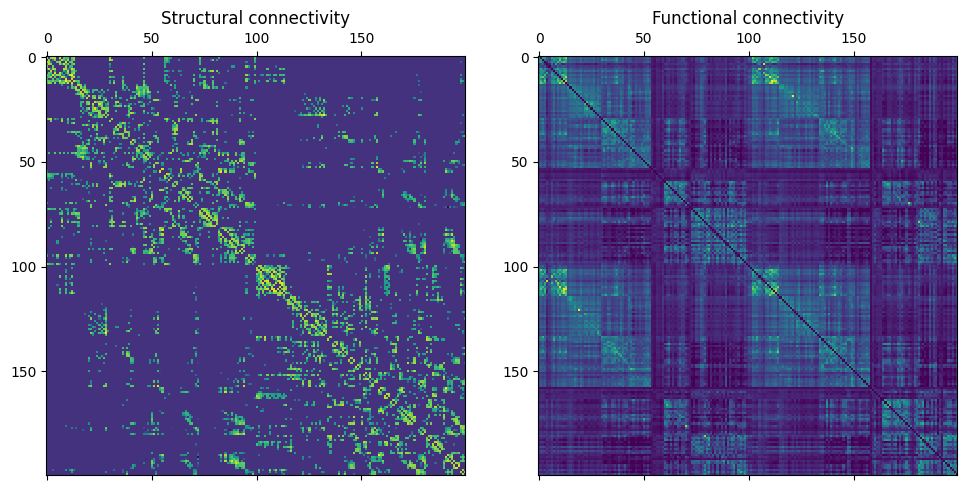

In [24]:
SC, labels_SC, _, _ = load_sc(parcellation="schaefer_200")
FC, labels_FC, _, _ = load_fc(parcellation="schaefer_200")

plt.rcParams['figure.figsize'] = [10, 5]

fig, axs = plt.subplots(1, 2, tight_layout=True)
axs[0].matshow(SC)
axs[0].set_title("Structural connectivity")
axs[1].matshow(FC)
axs[1].set_title("Functional connectivity")


In [25]:
SC

array([[ 0.    , 10.116 ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [10.116 ,  0.    ,  9.0994, ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  9.0994,  0.    , ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  9.3176,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  9.3176,  0.    ,  9.4461],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  9.4461,  0.    ]])

In [13]:
set(labels_SC) == set(labels_FC)

True

In [14]:
set(labels_SC) == set(mapping.roi_name)

False

In [15]:
set(labels_SC) == set(mapping.roi_name_csv)

True

In [17]:
df_csv = pd.read_csv(data.path('external/pytepfit/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv'))
df_csv

,ROI Label,ROI Name,R,A,S
0,1,7Networks_LH_Vis_1,-24,-54,-10
1,2,7Networks_LH_Vis_2,-26,-78,-14
2,3,7Networks_LH_Vis_3,-46,-70,-8
3,4,7Networks_LH_Vis_4,-10,-68,-4
4,5,7Networks_LH_Vis_5,-26,-96,-12
...,...,...,...,...,...
195,196,7Networks_RH_Default_PFCdPFCm_6,28,30,42
196,197,7Networks_RH_Default_PFCdPFCm_7,24,24,54
197,198,7Networks_RH_Default_pCunPCC_1,12,-54,14
198,199,7Networks_RH_Default_pCunPCC_2,6,-48,30


In [21]:
for i,j in zip(labels_SC,df_csv["ROI Name"]):
    if i != j:
        print(i,j)
else:
    print("Juhů, je to stejné!")

Juhů, je to stejné!
